**FCN - Inspect Weights of a Trained Model

This notebook includes code and visualizations to test, debug, and evaluate the Mask R-CNN model.

## Build FCN Model and display summary

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys, os, random, pprint
sys.path.append('../..')
import tensorflow as tf
import keras.backend as KB
import numpy as np
import skimage.io
import matplotlib.pyplot as plt
import mrcnn.visualize as visualize
import mrcnn.utils as utils
import mrcnn.prep_notebook as prep
from mrcnn.datagen         import data_generator, load_image_gt, data_gen_simulate
from mrcnn.utils           import mask_string, parse_image_meta, apply_box_deltas_tf
from mrcnn.prep_notebook   import build_newshapes_config, build_coco_config
from mrcnn.coco            import prep_coco_dataset, CocoConfig ## CocoDataset, CocoConfig, CocoInferenceConfig, evaluate_coco, build_coco_results
import mrcnn.model_fcn     as fcn_modellib
from mrcnn.utils           import log
pp = pprint.PrettyPrinter(indent=2, width=100)
np.set_printoptions(linewidth=100,precision=4,threshold=1000, suppress = True)

## Notebook Preferences
from mrcnn.utils import convertHtmlToPdf

# Device to load the neural network on Useful if you're training a model on the same 
# machine, in which case use CPU and leave the GPU for training.


Using TensorFlow backend.


In [2]:
##------------------------------------------------------------------------------------
## Parse command line arguments
##------------------------------------------------------------------------------------
input_parms = " --epochs 2 " 
input_parms +=" --steps_in_epoch  10 "    
input_parms +=" --val_steps        5 " 
input_parms +=" --last_epoch       0 "
input_parms +=" --batch_size       1 "
input_parms +=" --lr          0.0001 "
input_parms +=" --mrcnn_logs_dir train_mrcnn_newshapes "
input_parms +=" --fcn_logs_dir   train_fcn8L2_BCE "
# input_parms +=" --fcn_logs_dir   train_fcn32_newshapes "
input_parms +=" --mrcnn_model    last "
input_parms +=" --fcn_model      init "
input_parms +=" --opt            adam "
input_parms +=" --fcn_arch       fcn8L2 " 
input_parms +=" --fcn_layers     all " 
input_parms +=" --sysout         screen "
input_parms +=" --scale_factor     1 " 
input_parms +=" --new_log_folder   "        

parser = utils.command_line_parser()
args = parser.parse_args(input_parms.split())
utils.display_input_parms(args)
## Configurations


   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   None
   epochs                         2
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_bce_loss_class             0
   fcn_bce_loss_method            1
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8L2_BCE
   fcn_losses                     fcn_BCE_loss
   fcn_model                      init
   last_epoch                     0
   lr                             0.0001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn_newshapes
   mrcnn_model                    last
   new_log_folder                 True
   opt                            ADAM
   scale_factor                   1
   steps_in_epoch                 10
   sysout                         SCREEN
   val_steps                      5




In [3]:
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0
with tf.device(DEVICE):
    mrcnn_model, fcn_model = prep.build_fcn_inference_pipeline_newshapes(args = args, verbose = 1)

MODE IS: inference

--> Execution started at: 02-10-2019 @ 15:41:35
    Tensorflow Version: 1.8.0   Keras Version : 2.1.6 
    Build_mrcnn_inference_pipeline_newshapes MODE is : inference

   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   None
   epochs                         2
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_bce_loss_class             0
   fcn_bce_loss_method            1
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8L2_BCE
   fcn_losses                     fcn_BCE_loss
   fcn_model                      init
   last_epoch                     0
   lr                             0.0001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn_newshapes
   mrcnn_model                    last
   new_log_folder                 True
   opt            

    mrcnn_class_conv1              :  shape: (?, 1000, 1, 1, 1024)  KB.shape:(None, 1000, 1, 1, 1024)  Keras Tensor: True
    mrcnn_class_bn1                :  shape: (?, 1000, 1, 1, 1024)  KB.shape:(None, 1000, 1, 1, 1024)  Keras Tensor: True
    mrcnn_class_relu1              :  shape: (?, 1000, 1, 1, 1024)  KB.shape:(None, 1000, 1, 1, 1024)  Keras Tensor: True
                                   
    mrcnn_class_conv2              :  shape: (?, 1000, 1, 1, 1024)  KB.shape:(None, 1000, 1, 1, 1024)  Keras Tensor: True
    mrcnn_class_bn2                :  shape: (?, 1000, 1, 1, 1024)  KB.shape:(None, 1000, 1, 1, 1024)  Keras Tensor: True
    mrcnn_class_relu2              :  shape: (?, 1000, 1, 1, 1024)  KB.shape:(None, 1000, 1, 1, 1024)  Keras Tensor: True
                                   
    pool_squeeze(Shared)           :  shape: (?, 1000, 1024)       KB.shape:(None, 1000, 1024)    Keras Tensor: True
    mrcnn_class_logits             :  shape: (?, 1000, 7)          KB.shape:(No

    Weights file loaded: /home/kbardool/models_newshapes/train_mrcnn_newshapes/mrcnn20181216T0000/mrcnn_0472.h5 
MRCNN  MODEL Load weight file COMPLETE 
>>> Initialize Paths
 Linx  Linux

   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   None
   epochs                         2
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_bce_loss_class             0
   fcn_bce_loss_method            1
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8L2_BCE
   fcn_losses                     fcn_BCE_loss
   fcn_model                      init
   last_epoch                     0
   lr                             0.0001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn_newshapes
   mrcnn_model                    last
   new_log_folder                 True
   opt             

    hm_indices                     :  shape: (?, 2)                KB.shape:(None, 2)             Keras Tensor: False
    pt2_heatmaps                   :  shape: (?, 7, 128, 128)      KB.shape:(None, 7, 128, 128)   Keras Tensor: False
    pt2_heatmaps                   :  shape: (?, 128, 128)         KB.shape:(None, 128, 128)      Keras Tensor: False
    old_style_scores               :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    alt_scores_1                   :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    alt_scores_1_scattered         :  shape: (1, 7, 64, 3)         KB.shape:(1, 7, 64, 3)         Keras Tensor: False
    alt_scores_1_norm(by_class)    :  shape: (1, 7, 64, 3)         KB.shape:(1, 7, 64, 3)         Keras Tensor: False
    alt_scores_1_norm(by_image)    :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    Normalize heatmap within each class !---------------

In [3]:
fcn_config = build_newshapes_config( model = 'fcn', mode = 'inference', args = args)

>>> Initialize Paths
 Linx  Linux


In [4]:
## Build FCN Model
DEVICE = "/cpu:1"  # /cpu:0 or /gpu:0
with tf.device(DEVICE):
    ##------------------------------------------------------------------------------------
    ## Build FCN Model in Training Mode
    ##------------------------------------------------------------------------------------
    try :
        del fcn_model
        gc.collect()
    except: 
        pass    
#   fcn_model = fcn_modellib.FCN(mode="training", config=fcn_config, model_dir=fcn_config.TRAINING_PATH)
    fcn_model = fcn_modellib.FCN(mode="inference", arch='FCN8L2', config=fcn_config)

fcn_model.keras_model.summary()

>>> Initialize ModelBase model 
   Mode      :  inference
   Model dir :  /home/kbardool/models_newshapes/train_fcn8_l2_newshapes
>>> ModelBase initialiation complete
>>> Initialize FCN model, mode:  inference architecture:  FCN8L2
    arch set to FCN8 - with L2 Regularization
<function fcn8_l2_graph at 0x7f23504bab70>


---------------------------------------------------
 Build FCN Model -  Arch:  FCN8L2  mode:  inference
---------------------------------------------------

------------------------------------------------------
>>> FCN8L2 Layer With Regularization - mode: inference
------------------------------------------------------
     feature map      : (?, 128, 128, 7)
     height : 128 width : 128 classes : 7
     image_data_format:  channels_last
     rois_per_class   :  channels_last
     FCN L2 weight decay :  0.0001
     Set learning phase to : 0
   Input feature map                   :  (?, 128, 128, 7)
   FCN Block 11 shape is               :  (None, 128, 128, 64)
   FCN

    old_style_scores               :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    alt_scores_1                   :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    alt_scores_1_scattered         :  shape: (1, 7, 64, 3)         KB.shape:(1, 7, 64, 3)         Keras Tensor: False
    alt_scores_1_norm(by_class)    :  shape: (1, 7, 64, 3)         KB.shape:(1, 7, 64, 3)         Keras Tensor: False
    alt_scores_1_norm(by_image)    :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False

    Normalize heatmap within each class !-------------------------------------
    in_heatmap_norm :  (?, 7, 128, 128) Keras tensor  False
    normalizer shape   :  (?, 7, 1, 1)
    normalized heatmap :  (?, 7, 128, 128)  Keras tensor  False
    hm_indices shape               :  shape: (?, 2)                KB.shape:(None, 2)             Keras Tensor: False
    pt2_heatmaps                   :  shape: (?, 

## Set weight files

In [7]:
# DIR_WEIGHTS = '/home/kbardool/models/train_fcn_coco/fcn20181023T0825'
# DIR_WEIGHTS = '/home/kbardool/models/train_fcn8_coco/fcn20181026T1432'
# DIR_WEIGHTS =  'F:/models/train_fcn8_bce/fcn20181205T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization

# DIR_WEIGHTS =  'F:/models_newshapes/train_fcn8L2_BCE/fcn20181224T0000' 
# DIR_WEIGHTS =  '/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20181224T0000' 
# files   = ['fcn_0001.h5', 'fcn_0150.h5', 'fcn_0346.h5', 'fcn_0421.h5',
#            'fcn_0450.h5', 'fcn_0521.h5', 'fcn_0687.h5', 'fcn_0793.h5', 
#            'fcn_0821.h5', 'fcn_0940.h5', 'fcn_1012.h5', 'fcn_1127.h5',
#            'fcn_1644.h5', 'fcn_1776.h5', 'fcn_1848.h5', 'fcn_2017.h5', 'fcn_2084.h5']


## BCE with new heatmap layer                 
DIR_WEIGHTS =  '/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000' 
files   = ['initialization', 
           'fcn_0001.h5', 'fcn_0003.h5', 'fcn_0005.h5', 'fcn_0009.h5',
           'fcn_0012.h5', 'fcn_0020.h5', 'fcn_0023.h5', 'fcn_0027.h5',
           'fcn_0033.h5', 'fcn_0047.h5', 'fcn_0070.h5', 'fcn_0080.h5',
           'fcn_0101.h5', 'fcn_0106.h5', 'fcn_0112.h5', 'fcn_0124.h5',
           'fcn_0138.h5', 'fcn_0144.h5', 'fcn_0161.h5', 'fcn_0171.h5', 'fcn_0181.h5']

# DIR_WEIGHTS =  '/home/kbardool/models_newshapes/train_fcn8L2_BCE2/fcn20190131T0000' 
# files   = ['initialization', 'fcn_0001.h5', 'fcn_0022.h5', 'fcn_0057.h5', 'fcn_0092.h5',
#            'fcn_0101.h5', 'fcn_0220.h5', 'fcn_0290.h5', 'fcn_0304.h5',
#            'fcn_0372.h5', 'fcn_0423.h5', 'fcn_0500.h5', 'fcn_0530.h5',
#            'fcn_0578.h5', 'fcn_0648.h5']


# DIR_WEIGHTS =  'F:/models_newshapes/train_fcn8L2_BCE2/fcn20190131T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization
# files   = ['fcn_0500.h5']

## Histograms of Weights - Initial weight initialization

In [13]:
# Pick layer types to display
# a = visualize.display_weight_stats(fcn_model)
# a = visualize.display_weight_histograms(fcn_model,width=15,height=4, filename = 'initial_weights')
# weights_histogram = os.path.join(DIR_WEIGHTS  , 'initial_weights.png')
# a.savefig(weights_histogram)

## Write weight histograms to files 

Loading weights  /home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0101.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0101.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0101.h5
    Weights file loaded: /home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0101.h5 
FCN  MODEL Load weight file COMPLETE 
Loading weights  /home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0106.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0106.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_01

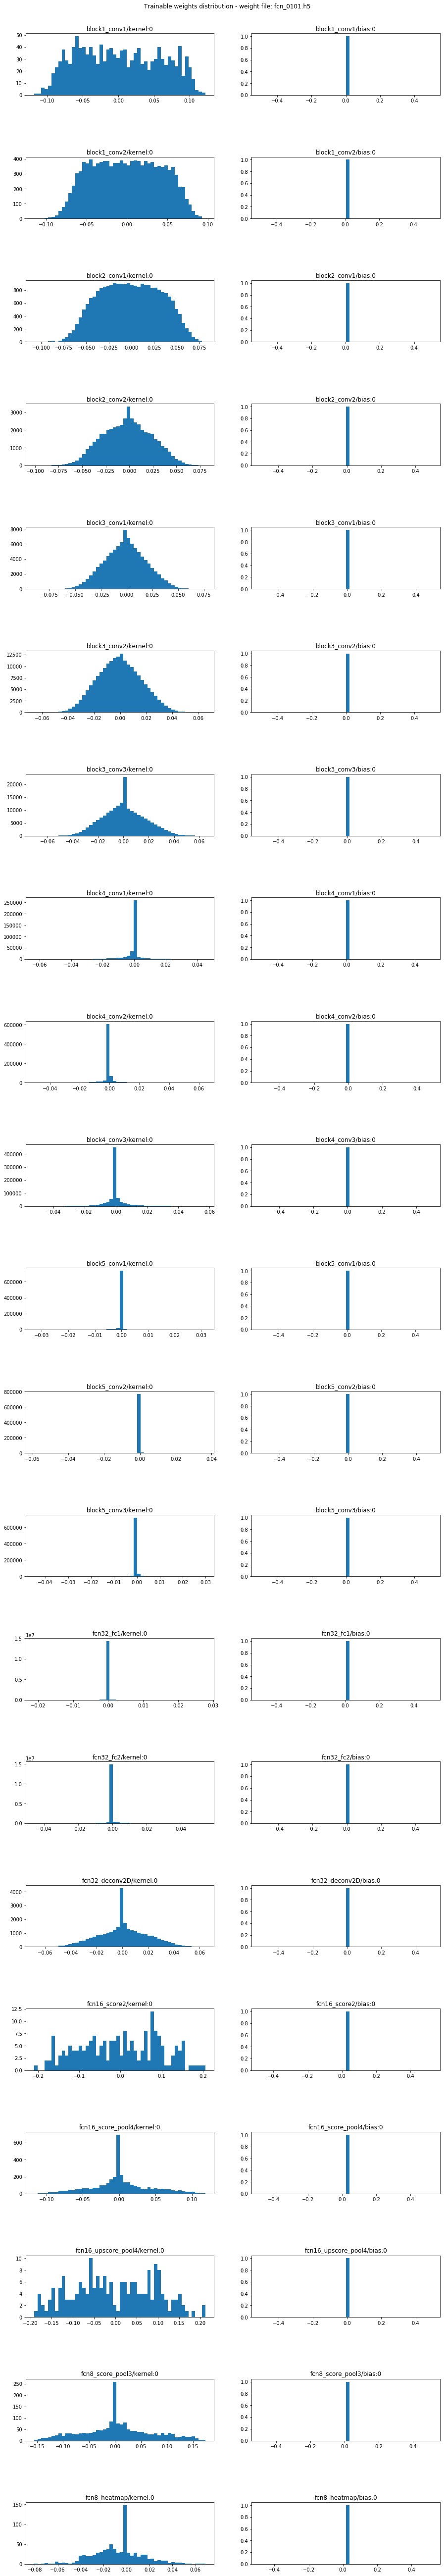

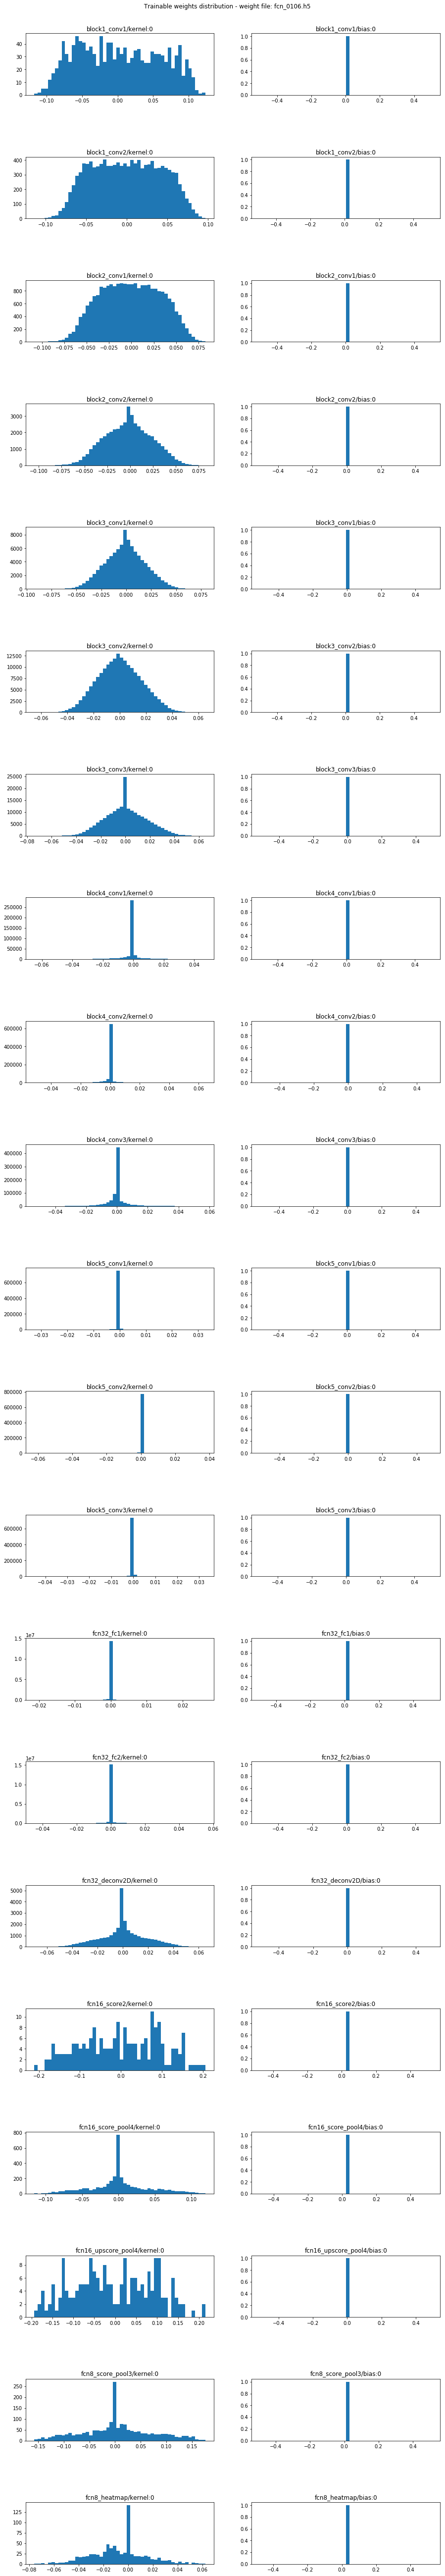

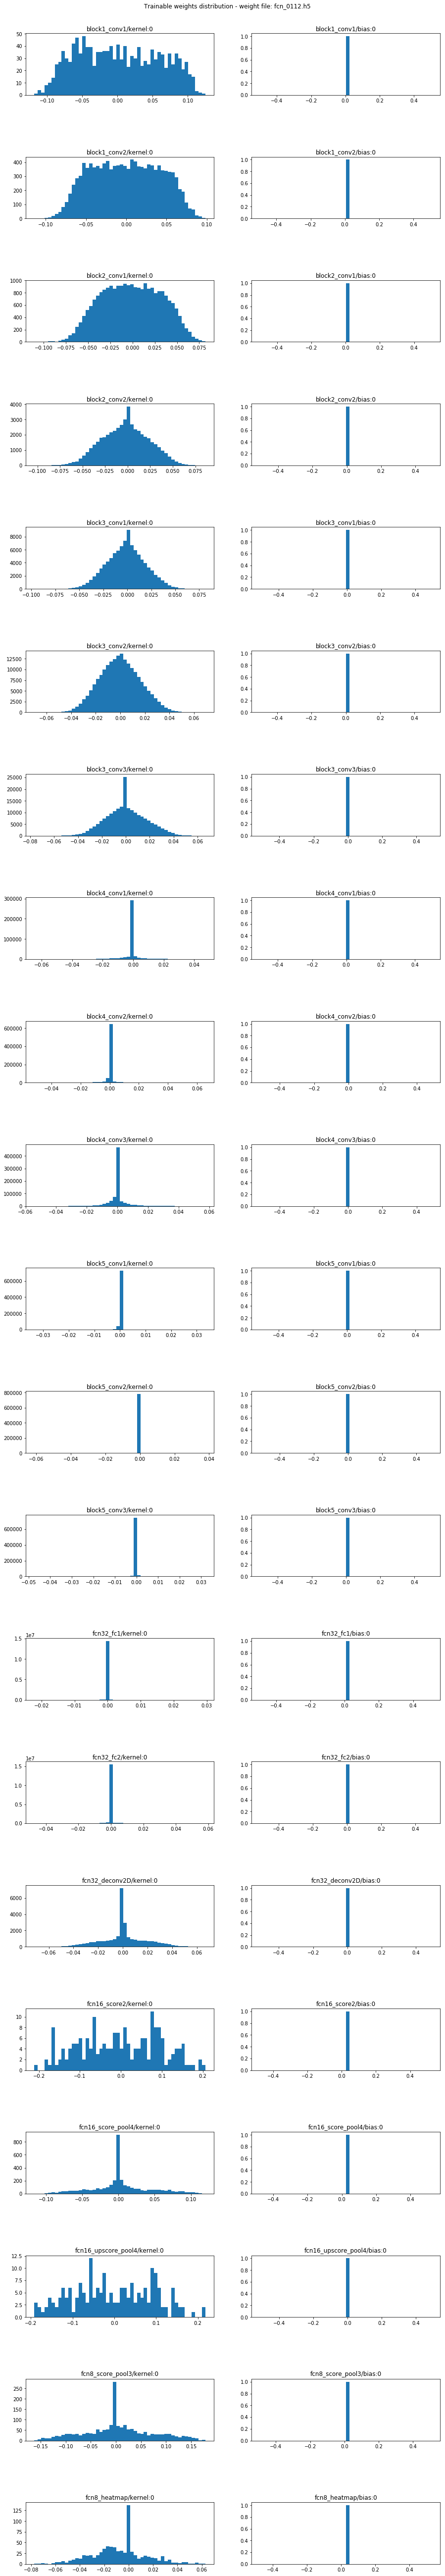

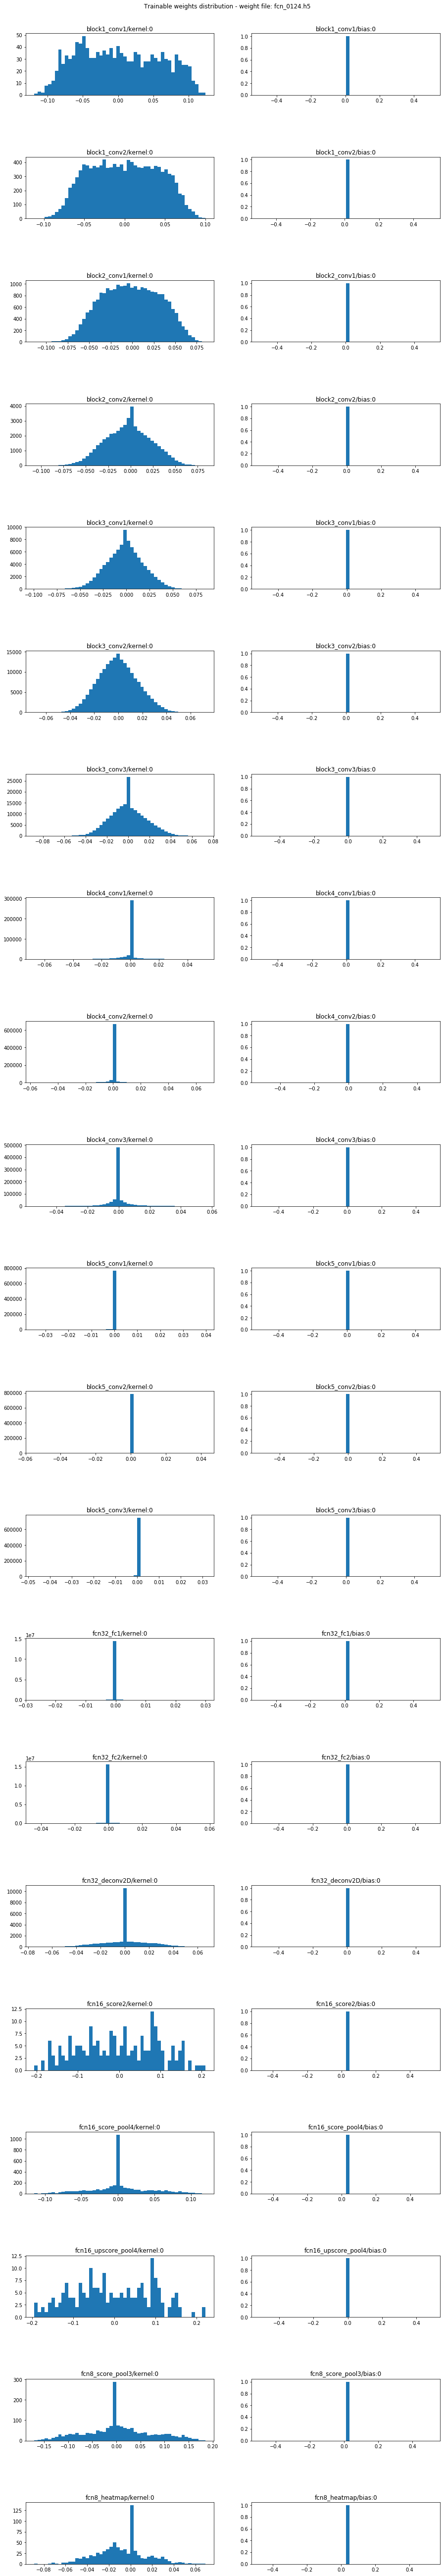

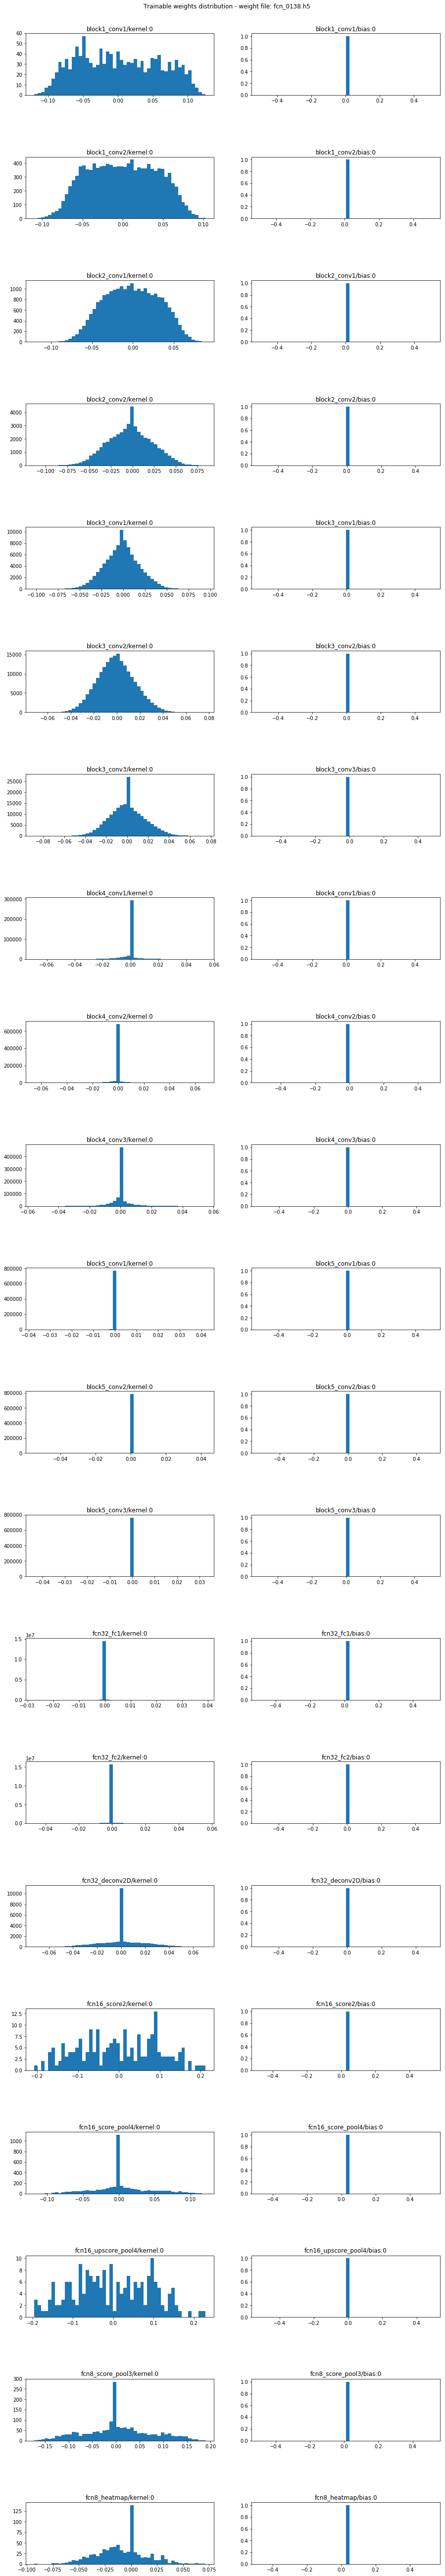

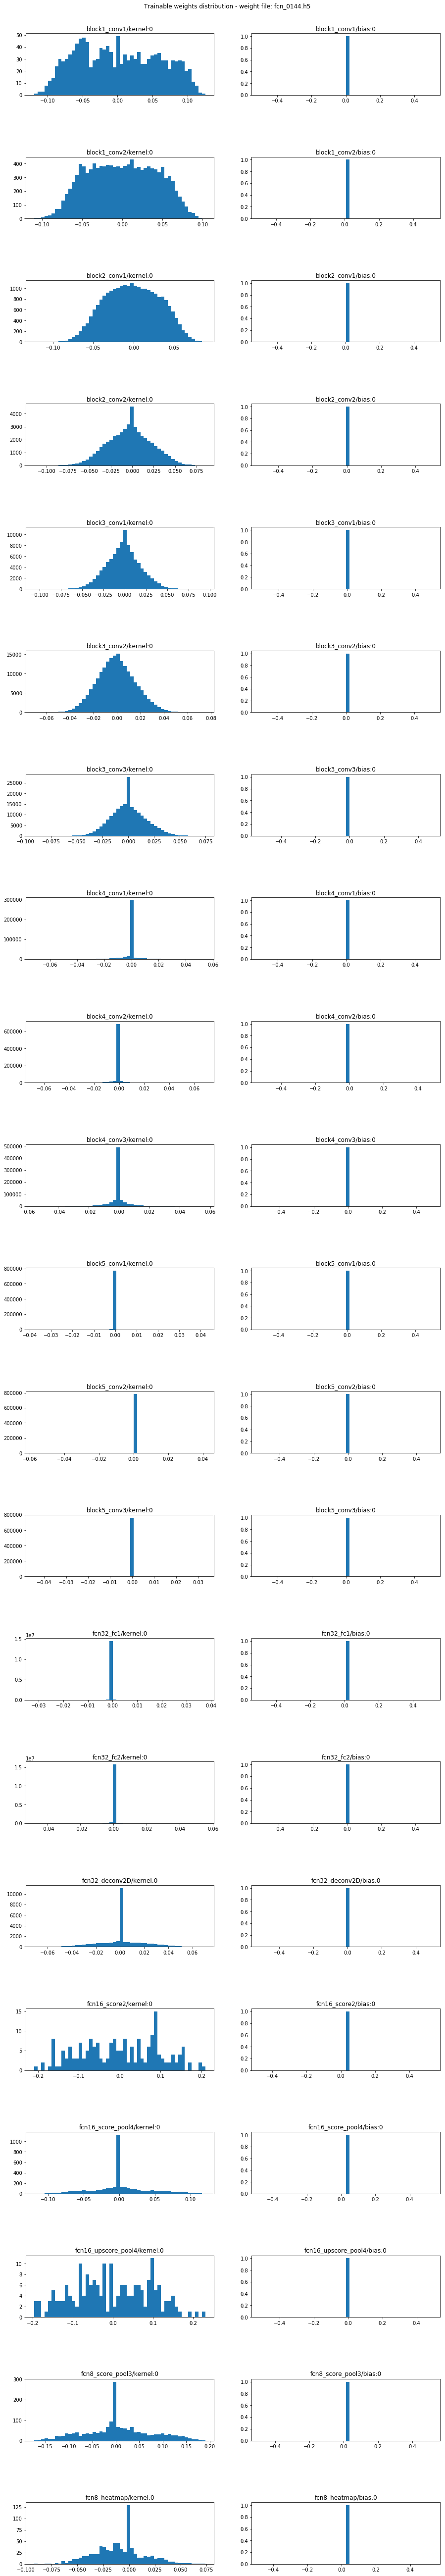

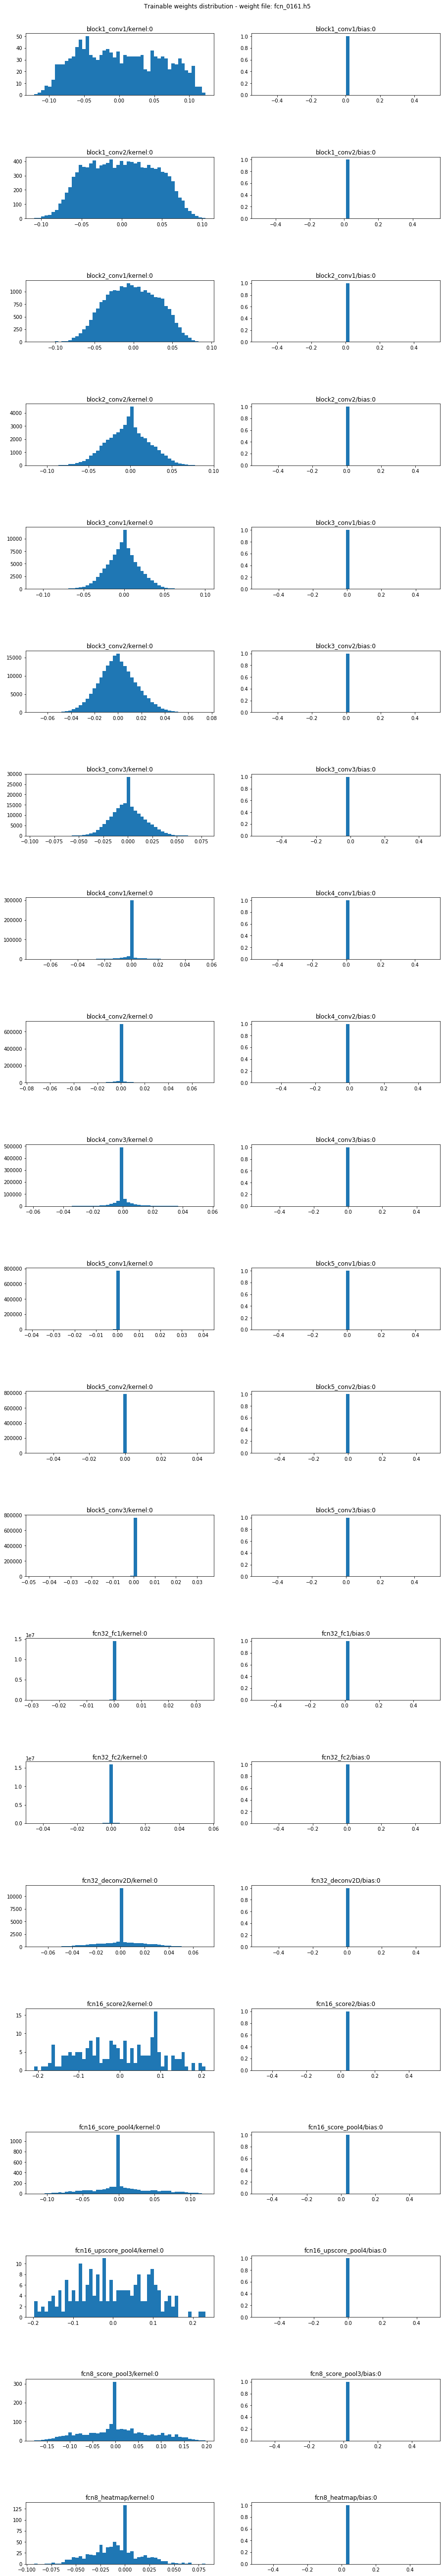

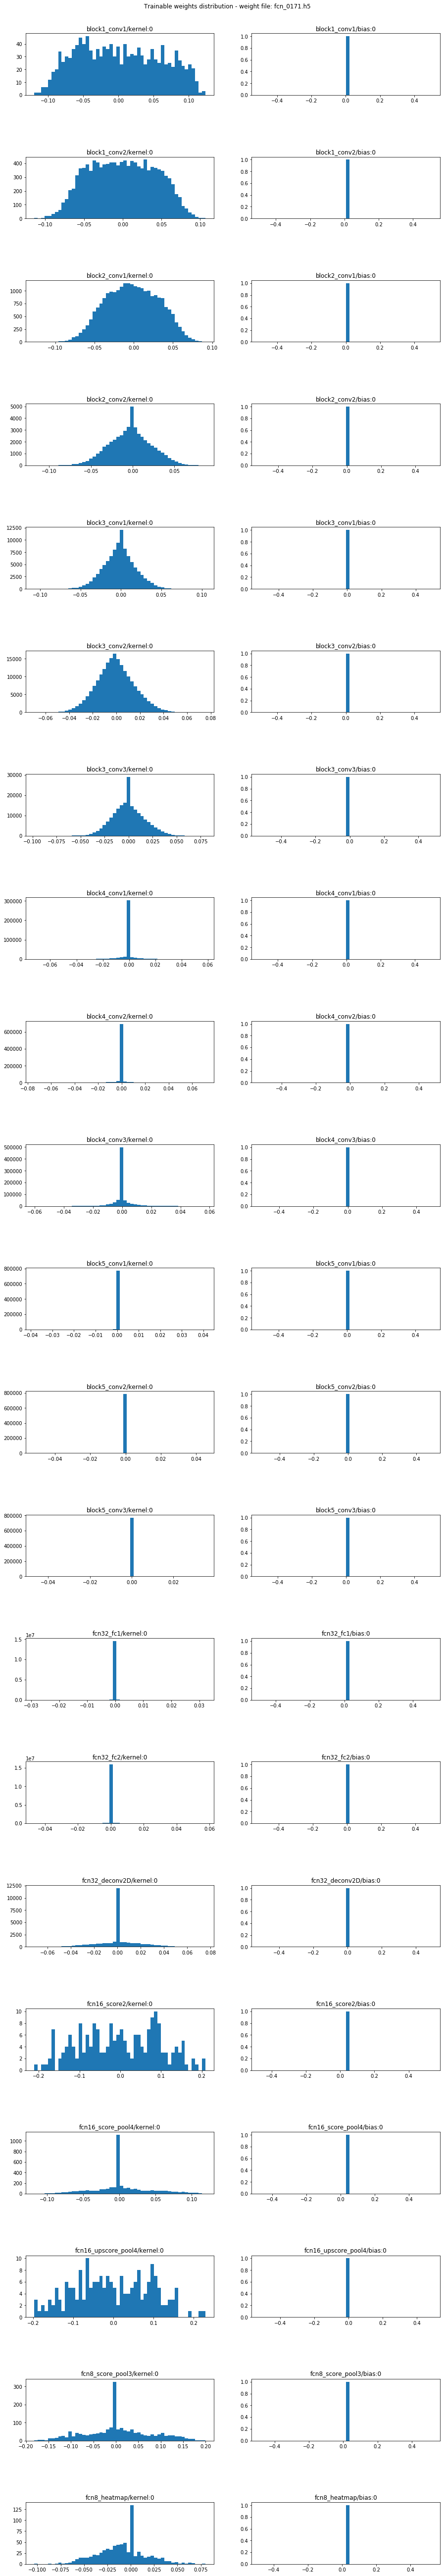

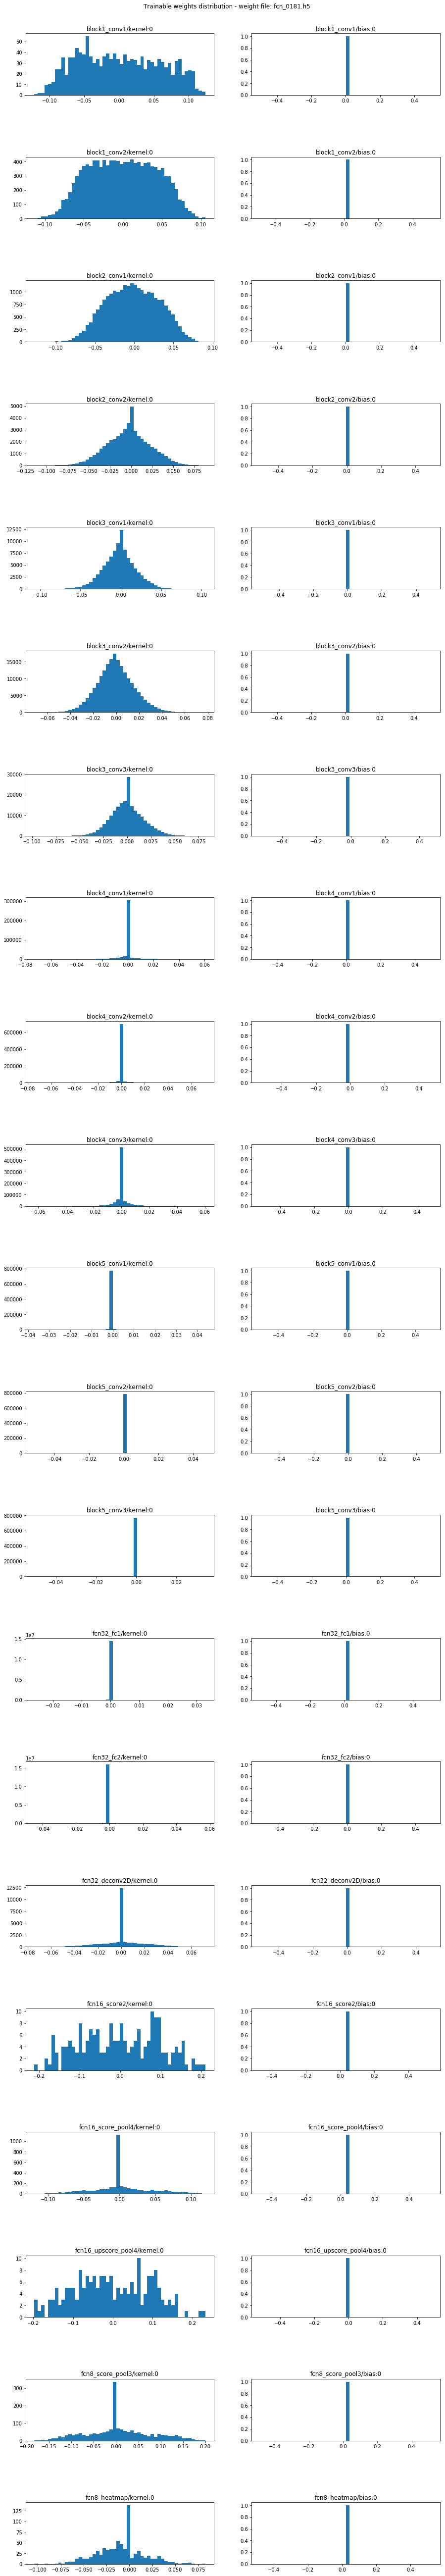

In [14]:
for FILE_IDX in range(13,22):
    weights_path = os.path.join(DIR_WEIGHTS  , files[FILE_IDX])
    print("Loading weights ", weights_path)
    fcn_model.load_model_weights(weights_path)
    a = visualize.display_weight_histograms(fcn_model,width=15,height=4, filename = files[FILE_IDX])
    weights_histogram = os.path.join(DIR_WEIGHTS  , 'histogram_'+files[FILE_IDX]+'.png')
    a.savefig(weights_histogram)

## Load Weights - 1

In [7]:
FILE_IDX = 1

weights_path = os.path.join(DIR_WEIGHTS  , files[FILE_IDX])
print("Loading weights ", weights_path)
fcn_model.load_model_weights(weights_path)

Loading weights  /home/kbardool/models_newshapes/train_fcn8L2_BCE2/fcn20190131T0000/fcn_0001.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes/train_fcn8L2_BCE2/fcn20190131T0000/fcn_0001.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes/train_fcn8L2_BCE2/fcn20190131T0000/fcn_0001.h5
    Weights file loaded: /home/kbardool/models_newshapes/train_fcn8L2_BCE2/fcn20190131T0000/fcn_0001.h5 
FCN  MODEL Load weight file COMPLETE 


### Review Weight Stats - 1st weight file

In [12]:
# Show stats of all trainable weights    
a = visualize.display_weight_stats(fcn_model)
weights_stats = os.path.join(DIR_WEIGHTS  , 'stats_'+files[FILE_IDX]+'.pdf')
# utils.convertHtmlToPdf(a, weights_stats) 

LAYER,WEIGHT NAME,LAYER TYPE,SHAPE,MIN,MAX,STD
0,block1_conv1/kernel:0,Conv2D,"(3, 3, 7, 64)",-0.1021931395,+0.1028567255,+0.0551653504
0,block1_conv1/bias:0,Conv2D,"(64,)",-0.0036792792,+0.0028679522,+0.0013265240
1,block1_conv2/kernel:0,Conv2D,"(3, 3, 64, 64)",-0.0770705640,+0.0786415264,+0.0415249951
1,block1_conv2/bias:0,Conv2D,"(64,)",-0.0020202661,+0.0026377756,+0.0010441870
2,block2_conv1/kernel:0,Conv2D,"(3, 3, 64, 128)",-0.0619441867,+0.0645153821,+0.0337774158
2,block2_conv1/bias:0,Conv2D,"(128,)",-0.0019615600,+0.0022295516,+0.0008920129
3,block2_conv2/kernel:0,Conv2D,"(3, 3, 128, 128)",-0.0549583882,+0.0558314547,+0.0292220451
3,block2_conv2/bias:0,Conv2D,"(128,)",-0.0021079916,+0.0025140413,+0.0009304707
4,block3_conv1/kernel:0,Conv2D,"(3, 3, 128, 256)",-0.0442353338,+0.0456518494,+0.0238395743
4,block3_conv1/bias:0,Conv2D,"(256,)",-0.0018051047,+0.0034200652,+0.0009527938


### Histograms of Weights - 1st weight file

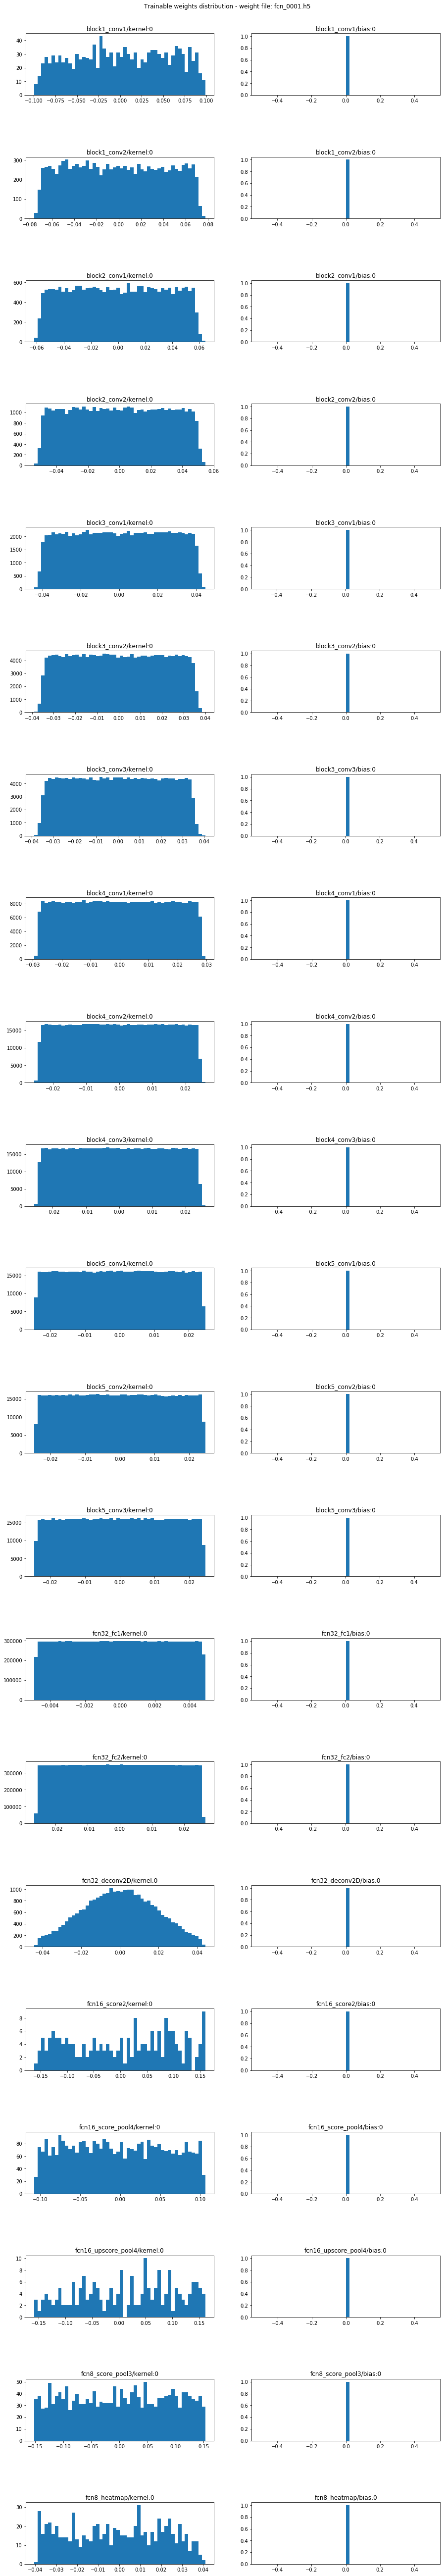

In [8]:
# Pick layer types to display
a = visualize.display_weight_histograms(fcn_model,width=15,height=4, filename = files[FILE_IDX])
weights_histogram = os.path.join(DIR_WEIGHTS  , 'histogram_'+files[FILE_IDX]+'.png')
a.savefig(weights_histogram)

## Load Weights - 2nd weight file

In [9]:
FILE_IDX = 2

weights_path = os.path.join(DIR_WEIGHTS  , files[FILE_IDX])
print("Loading weights ", weights_path)
fcn_model.load_model_weights(weights_path)

Loading weights  /home/kbardool/models_newshapes/train_fcn8L2_BCE2/fcn20190131T0000/fcn_0022.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes/train_fcn8L2_BCE2/fcn20190131T0000/fcn_0022.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes/train_fcn8L2_BCE2/fcn20190131T0000/fcn_0022.h5
    Weights file loaded: /home/kbardool/models_newshapes/train_fcn8L2_BCE2/fcn20190131T0000/fcn_0022.h5 
FCN  MODEL Load weight file COMPLETE 


### Review Weight Stats - 2nd weights file

In [10]:
# Show stats of all trainable weights    
a = visualize.display_weight_stats(fcn_model)
weights_stats = os.path.join(DIR_WEIGHTS  , 'stats_'+files[FILE_IDX]+'.pdf')
# utils.convertHtmlToPdf(a, weights_stats) 

LAYER,WEIGHT NAME,LAYER TYPE,SHAPE,MIN,MAX,STD
0,block1_conv1/kernel:0,Conv2D,"(3, 3, 7, 64)",-0.1023562551,+0.1067964584,+0.0378944613
0,block1_conv1/bias:0,Conv2D,"(64,)",-0.0115950499,+0.0139414277,+0.0070752222
1,block1_conv2/kernel:0,Conv2D,"(3, 3, 64, 64)",-0.0738444850,+0.0801710039,+0.0303053576
1,block1_conv2/bias:0,Conv2D,"(64,)",-0.0114247873,+0.0161533821,+0.0070438185
2,block2_conv1/kernel:0,Conv2D,"(3, 3, 64, 128)",-0.0622419454,+0.0684995204,+0.0237452909
2,block2_conv1/bias:0,Conv2D,"(128,)",-0.0106892595,+0.0117730331,+0.0044944566
3,block2_conv2/kernel:0,Conv2D,"(3, 3, 128, 128)",-0.0550001636,+0.0622433238,+0.0200030711
3,block2_conv2/bias:0,Conv2D,"(128,)",-0.0097202575,+0.0104920380,+0.0037660017
4,block3_conv1/kernel:0,Conv2D,"(3, 3, 128, 256)",-0.0488444306,+0.0533977710,+0.0167743098
4,block3_conv1/bias:0,Conv2D,"(256,)",-0.0055224635,+0.0106030954,+0.0024990758


### Histograms of Weights - 2nd weights file

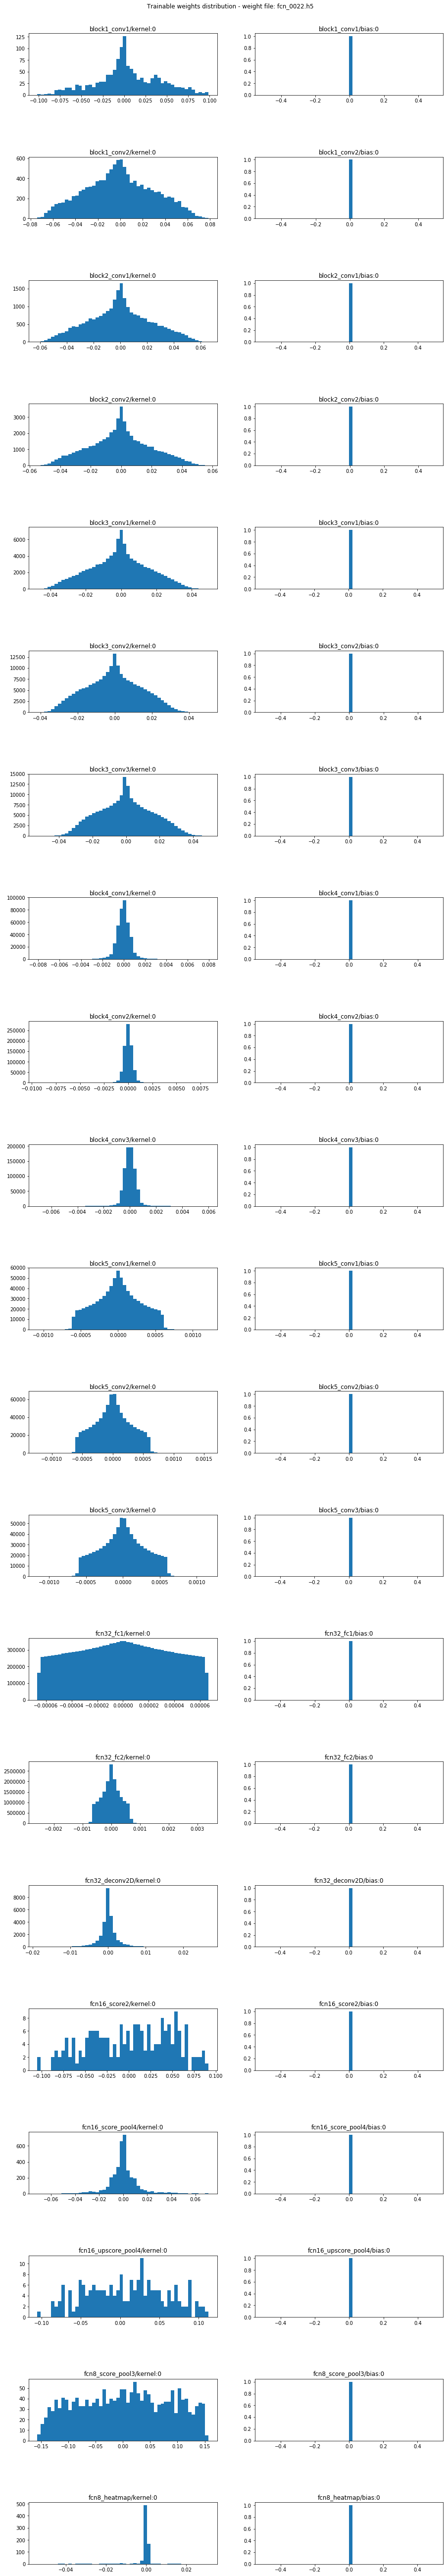

In [11]:
# Pick layer types to display
a = visualize.display_weight_histograms(fcn_model,width=15,height=4, filename = files[FILE_IDX])
weights_histogram = os.path.join(DIR_WEIGHTS  , 'histogram_'+files[FILE_IDX]+'.png')
a.savefig(weights_histogram)

## Load Weights - 3rd weight file

### load

In [19]:
FILE_IDX = 3
weights_path = os.path.join(DIR_WEIGHTS  , files[FILE_IDX])
print("Loading weights ", weights_path)
fcn_model.load_model_weights(weights_path)

Loading weights  /home/kbardool/models_newshapes/train_fcn8L2_BCE2/fcn20190131T0000/fcn_0057.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes/train_fcn8L2_BCE2/fcn20190131T0000/fcn_0057.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes/train_fcn8L2_BCE2/fcn20190131T0000/fcn_0057.h5
    Weights file loaded: /home/kbardool/models_newshapes/train_fcn8L2_BCE2/fcn20190131T0000/fcn_0057.h5 
FCN  MODEL Load weight file COMPLETE 


### Review Weight Stats - 3rd weight file

In [20]:
# Show stats of all trainable weights    
a = visualize.display_weight_stats(fcn_model)
weights_stats = os.path.join(DIR_WEIGHTS  , 'stats_'+files[FILE_IDX]+'.pdf')

LAYER,WEIGHT NAME,LAYER TYPE,SHAPE,MIN,MAX,STD
0,block1_conv1/kernel:0,Conv2D,"(3, 3, 7, 64)",-0.1044793800,+0.1076868623,+0.0289392676
0,block1_conv1/bias:0,Conv2D,"(64,)",-0.0176337957,+0.0149109717,+0.0081079509
1,block1_conv2/kernel:0,Conv2D,"(3, 3, 64, 64)",-0.0745130926,+0.0805712938,+0.0216559302
1,block1_conv2/bias:0,Conv2D,"(64,)",-0.0151744206,+0.0148005718,+0.0077932663
2,block2_conv1/kernel:0,Conv2D,"(3, 3, 64, 128)",-0.0623739064,+0.0723280311,+0.0160645563
2,block2_conv1/bias:0,Conv2D,"(128,)",-0.0157292522,+0.0187581778,+0.0064588157
3,block2_conv2/kernel:0,Conv2D,"(3, 3, 128, 128)",-0.0533386879,+0.0658856109,+0.0128949201
3,block2_conv2/bias:0,Conv2D,"(128,)",-0.0137175275,+0.0301382374,+0.0056567295
4,block3_conv1/kernel:0,Conv2D,"(3, 3, 128, 256)",-0.0505047664,+0.0571949482,+0.0106305061
4,block3_conv1/bias:0,Conv2D,"(256,)",-0.0097885923,+0.0189559236,+0.0051872404


### Histograms of Weights - 3rd weight file

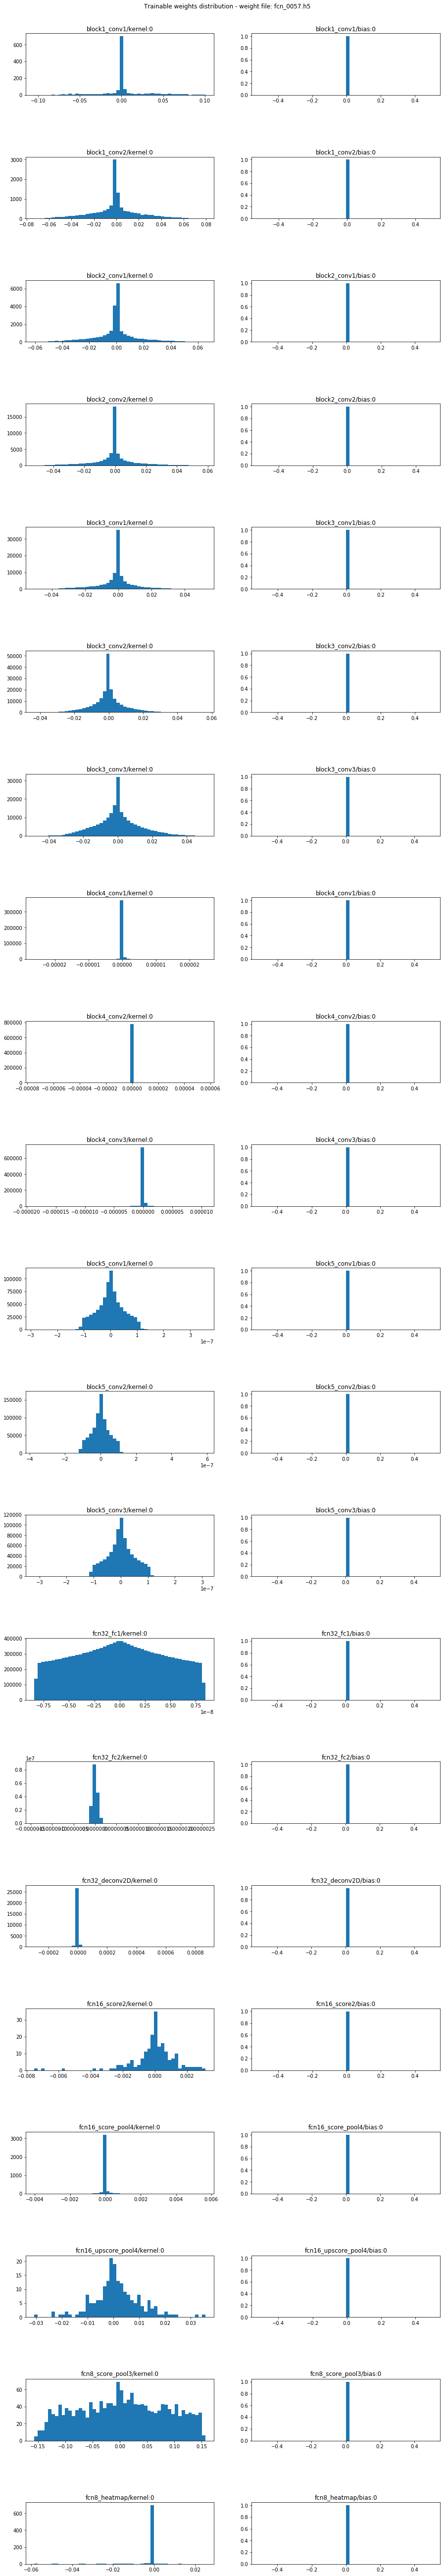

In [21]:
# Pick layer types to display
a = visualize.display_weight_histograms(fcn_model,width=15,height=4, filename = files[FILE_IDX])
weights_histogram = os.path.join(DIR_WEIGHTS  , 'histogram_'+files[FILE_IDX]+'.png')
a.savefig(weights_histogram)

## Load Weights - 4rd weight file

In [24]:
FILE_IDX = 4
weights_path = os.path.join(DIR_WEIGHTS  , files[FILE_IDX])
print("Loading weights ", weights_path)
fcn_model.load_model_weights(weights_path) 

Loading weights  /home/kbardool/models_newshapes/train_fcn8L2_BCE2/fcn20190131T0000/fcn_0092.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes/train_fcn8L2_BCE2/fcn20190131T0000/fcn_0092.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes/train_fcn8L2_BCE2/fcn20190131T0000/fcn_0092.h5
    Weights file loaded: /home/kbardool/models_newshapes/train_fcn8L2_BCE2/fcn20190131T0000/fcn_0092.h5 
FCN  MODEL Load weight file COMPLETE 


### Review Weight Stats - 4th weight file

In [25]:
# Show stats of all trainable weights    
a = visualize.display_weight_stats(fcn_model)


LAYER,WEIGHT NAME,LAYER TYPE,SHAPE,MIN,MAX,STD
0,block1_conv1/kernel:0,Conv2D,"(3, 3, 7, 64)",-0.0989782512,+0.1089993641,+0.0264566131
0,block1_conv1/bias:0,Conv2D,"(64,)",-0.0233071428,+0.0139451390,+0.0081151975
1,block1_conv2/kernel:0,Conv2D,"(3, 3, 64, 64)",-0.0744049400,+0.0820452198,+0.0167536158
1,block1_conv2/bias:0,Conv2D,"(64,)",-0.0146765430,+0.0140192490,+0.0073070573
2,block2_conv1/kernel:0,Conv2D,"(3, 3, 64, 128)",-0.0620714910,+0.0759582818,+0.0118631544
2,block2_conv1/bias:0,Conv2D,"(128,)",-0.0176133774,+0.0271175653,+0.0076047084
3,block2_conv2/kernel:0,Conv2D,"(3, 3, 128, 128)",-0.0512930565,+0.0675856099,+0.0095821414
3,block2_conv2/bias:0,Conv2D,"(128,)",-0.0181108192,+0.0324294530,+0.0068221255
4,block3_conv1/kernel:0,Conv2D,"(3, 3, 128, 256)",-0.0481253862,+0.0610434525,+0.0077573461
4,block3_conv1/bias:0,Conv2D,"(256,)",-0.0138076572,+0.0253035240,+0.0071592866


### Histograms of Weights

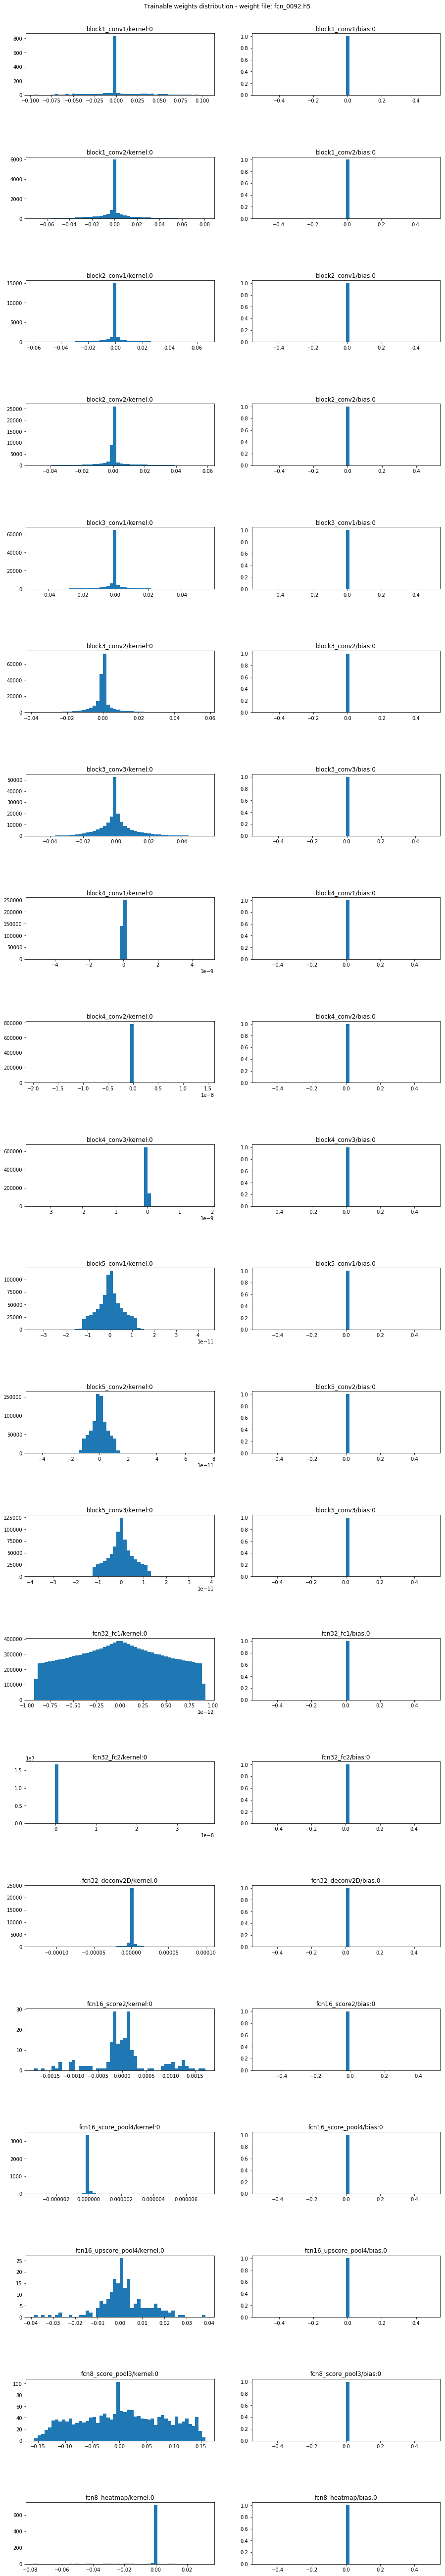

In [26]:
a = visualize.display_weight_histograms(fcn_model, filename = files[FILE_IDX])
weights_histogram = os.path.join(DIR_WEIGHTS  , 'histogram_'+files[FILE_IDX]+'.png')
a.savefig(weights_histogram)

## Load Weights - 5th weight file

In [27]:
print(len(files))
weights_path = os.path.join(DIR_WEIGHTS  , files[5])
fcn_model.load_model_weights(weights_path) 

15
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes/train_fcn8L2_BCE2/fcn20190131T0000/fcn_0101.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes/train_fcn8L2_BCE2/fcn20190131T0000/fcn_0101.h5
    Weights file loaded: /home/kbardool/models_newshapes/train_fcn8L2_BCE2/fcn20190131T0000/fcn_0101.h5 
FCN  MODEL Load weight file COMPLETE 


### Review Weight Stats - 5th weight file

In [29]:
# Show stats of all trainable weights    
_ = visualize.display_weight_stats(fcn_model)

LAYER,WEIGHT NAME,LAYER TYPE,SHAPE,MIN,MAX,STD
0,block1_conv1/kernel:0,Conv2D,"(3, 3, 7, 64)",-0.0980092585,+0.1092537269,+0.0261887796
0,block1_conv1/bias:0,Conv2D,"(64,)",-0.0229428392,+0.0149719212,+0.0082529550
1,block1_conv2/kernel:0,Conv2D,"(3, 3, 64, 64)",-0.0741292760,+0.0820357576,+0.0165299308
1,block1_conv2/bias:0,Conv2D,"(64,)",-0.0149101475,+0.0159969106,+0.0078338096
2,block2_conv1/kernel:0,Conv2D,"(3, 3, 64, 128)",-0.0626167133,+0.0761481524,+0.0117170764
2,block2_conv1/bias:0,Conv2D,"(128,)",-0.0160781629,+0.0293488577,+0.0081245499
3,block2_conv2/kernel:0,Conv2D,"(3, 3, 128, 128)",-0.0515477844,+0.0674586892,+0.0094772493
3,block2_conv2/bias:0,Conv2D,"(128,)",-0.0183460712,+0.0345605612,+0.0072413422
4,block3_conv1/kernel:0,Conv2D,"(3, 3, 128, 256)",-0.0479716919,+0.0613138713,+0.0076572304
4,block3_conv1/bias:0,Conv2D,"(256,)",-0.0137639055,+0.0276681855,+0.0077365590


### Histograms of Weights - 5th weight file

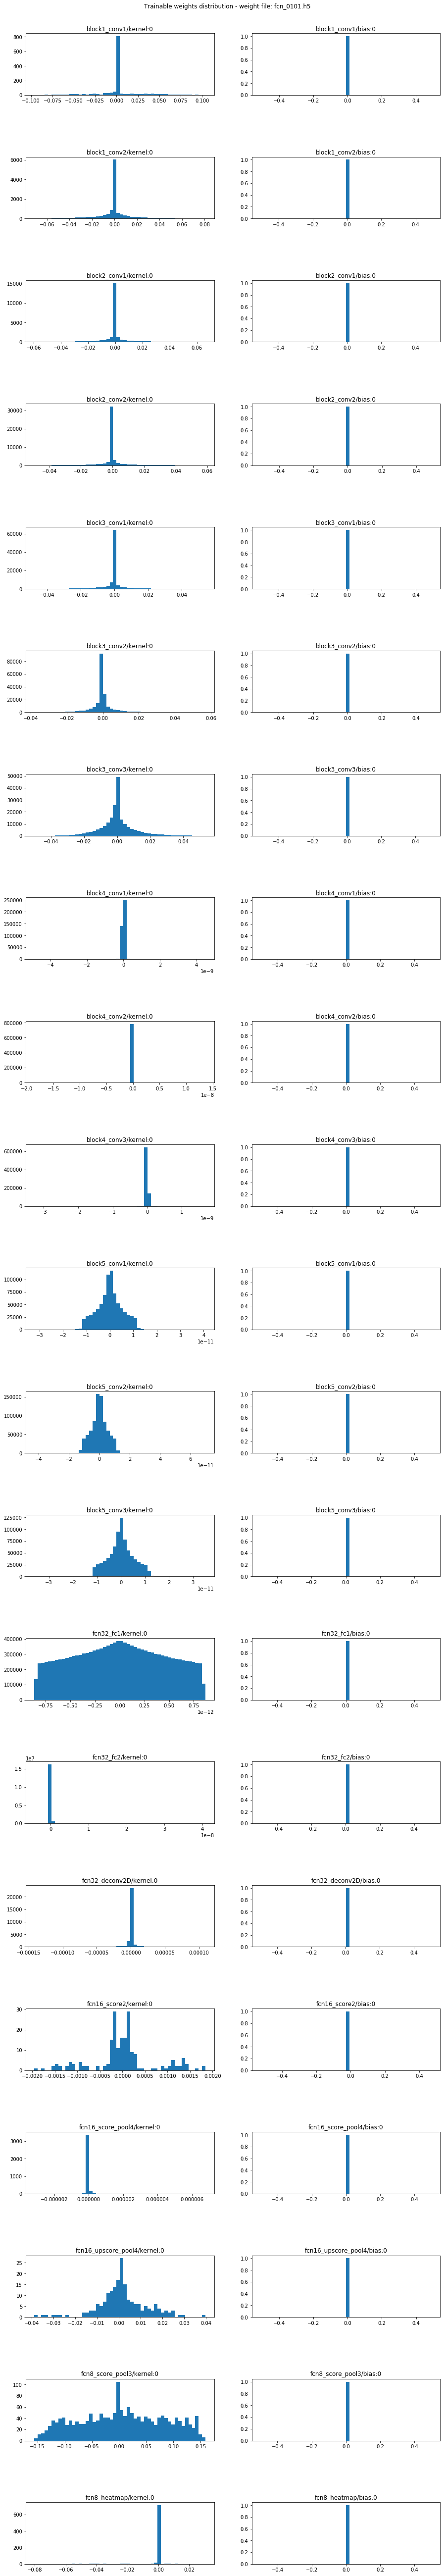

In [30]:
a = visualize.display_weight_histograms(fcn_model, filename = files[5])
weights_histogram = os.path.join(DIR_WEIGHTS  , 'histogram_'+files[5]+'.png')
a.savefig(weights_histogram)

## Load Weights - 6th weight file

In [26]:
weights_path = os.path.join(DIR_WEIGHTS  , files[5])
fcn_model.load_model_weights(weights_path) 

-----------------------------------------------
 Load Model with init parm: [ F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0041.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0041.h5
    Weights file loaded: F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0041.h5 
FCN  MODEL Load weight file COMPLETE 


### Review Weight Stats - 6th weight file

In [27]:
# Show stats of all trainable weights    
# _ = visualize.display_weight_stats(fcn_model)

### Histograms of Weights - 6th weight file

In [16]:
# a = visualize.display_weight_histograms(fcn_model, filename = files[5])
# weights_histogram = os.path.join(DIR_WEIGHTS  , 'histogram_'+files[5]+'.png')
# a.savefig(weights_histogram)

## Load Weights - 7th weight file

In [29]:
weights_path = os.path.join(DIR_WEIGHTS  , files[6])
fcn_model.load_model_weights(weights_path) 

-----------------------------------------------
 Load Model with init parm: [ F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0056.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0056.h5
    Weights file loaded: F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0056.h5 
FCN  MODEL Load weight file COMPLETE 


### Review Weight Stats - 7th weight file

In [28]:
# Show stats of all trainable weights    
# _ = visualize.display_weight_stats(fcn_model)

### Histograms of Weights - 7th weight file

In [17]:
# a = visualize.display_weight_histograms(fcn_model, filename = files[6])
# weights_histogram = os.path.join(DIR_WEIGHTS  , 'histogram_'+files[6]+'.png')
# a.savefig(weights_histogram)

## Load Weights - 8th weight file

In [33]:
weights_path = os.path.join(DIR_WEIGHTS  , files[7])
fcn_model.load_model_weights(weights_path) 

-----------------------------------------------
 Load Model with init parm: [ F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0063.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0063.h5
    Weights file loaded: F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0063.h5 
FCN  MODEL Load weight file COMPLETE 


### Review Weight Stats - 8th weight file

In [29]:
# Show stats of all trainable weights    
# _ = visualize.display_weight_stats(fcn_model)

### Histograms of Weights - 8th weight file

In [18]:
# a = visualize.display_weight_histograms(fcn_model, filename = files[7])
# weights_histogram = os.path.join(DIR_WEIGHTS  , 'histogram_'+files[7]+'.png')
# a.savefig(weights_histogram)

## Load Weights - 9th weight file

In [36]:
weights_path = os.path.join(DIR_WEIGHTS  , files[8])
fcn_model.load_model_weights(weights_path) 

-----------------------------------------------
 Load Model with init parm: [ F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0081.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0081.h5
    Weights file loaded: F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0081.h5 
FCN  MODEL Load weight file COMPLETE 


### Review Weight Stats - 9th weight file

In [30]:
# Show stats of all trainable weights    
# _ = visualize.display_weight_stats(fcn_model)

### Histograms of Weights - 9th weight file

In [19]:
# a = visualize.display_weight_histograms(fcn_model, filename = files[8])
# weights_histogram = os.path.join(DIR_WEIGHTS  , 'histogram_'+files[8]+'.png')
# a.savefig(weights_histogram)